In [25]:
!pip install scikit-plot

In [26]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, confusion_matrix, accuracy_score, f1_score, recall_score, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import numpy as np
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV



In [27]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#Change the directory to Machine-Learning folder
%cd /content/drive/My Drive/Colab Notebooks/Machine-Learning/

/content/drive/My Drive/Colab Notebooks/Machine-Learning


In [29]:
#importing our  dataset
ds = pd.read_csv('./car_evaluation.csv')

In [30]:
ds.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [31]:
#Get the columns
columns = ["Buy_price","mcost","ndoors","nop","lug_boot","safety","decision"]
ds.columns = columns

In [32]:
ds.head()

X_list=["Buy_price","mcost","ndoors","nop","lug_boot","safety"]

X=ds[X_list]
y=ds.decision
y.value_counts()

decision
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [33]:
# Display the dataset shape
ds.shape

(1727, 7)

In [34]:
#y[:5]

In [35]:
def grp_brplt(col1):

    df1 = ds.groupby(['decision',col1]).size().to_frame('total').reset_index()

    plt.figure(figsize=(10,8))
    ax=plt.subplot()
    ax = sns.barplot(data=df1, x=df1[col1], y=df1["total"], hue=df1["decision"])

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 9),
                       textcoords = 'offset points')

    ax.set_title('Distribution of ' +col1+ ' per target variable', fontsize=20)
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='decision')
    return ax

<Axes: title={'center': 'Distribution of Buy_price per target variable'}, xlabel='Buy_price', ylabel='total'>

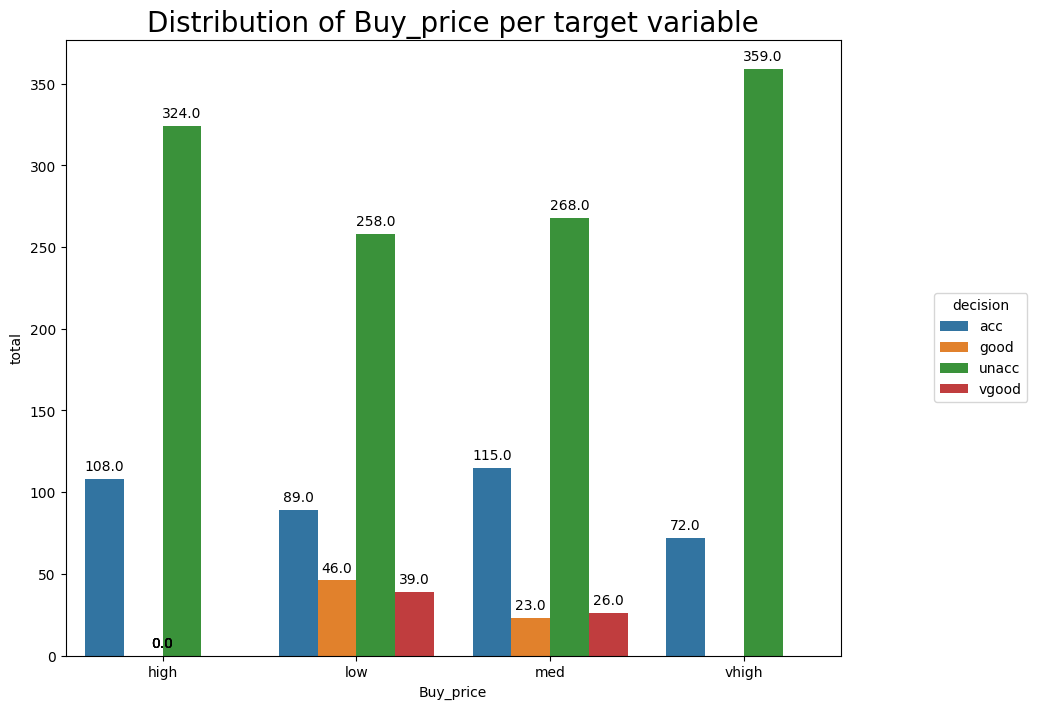

In [36]:
grp_brplt("Buy_price")

<Axes: title={'center': 'Distribution of mcost per target variable'}, xlabel='mcost', ylabel='total'>

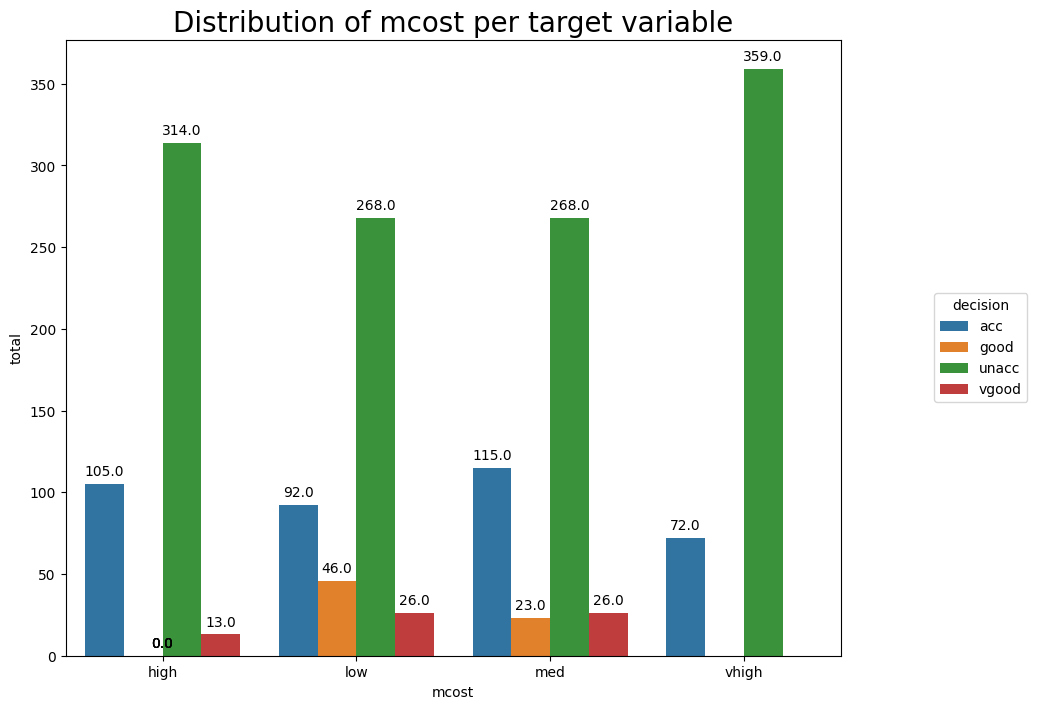

In [37]:
grp_brplt("mcost")

<Axes: title={'center': 'Distribution of ndoors per target variable'}, xlabel='ndoors', ylabel='total'>

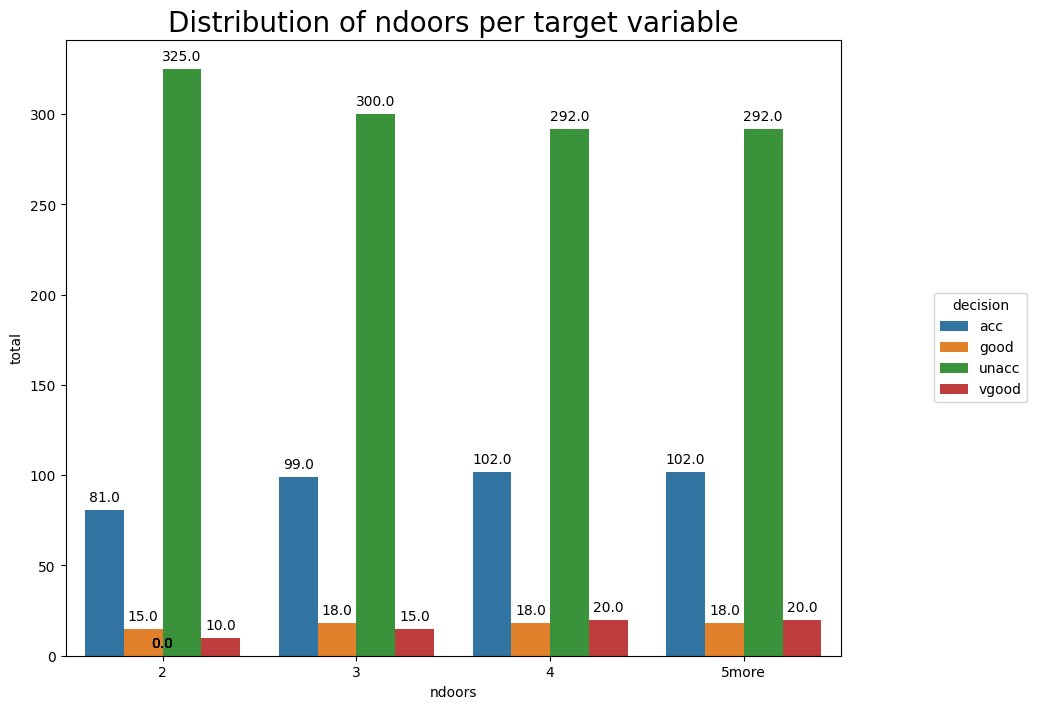

In [38]:
grp_brplt("ndoors")

In [39]:
!pip install category_encoders

In [40]:
# importing necessary package for encoding our categorial features
import category_encoders as ce

encoder_X = ce.OrdinalEncoder(cols=["Buy_price","mcost","ndoors","nop","lug_boot","safety"])
X= encoder_X.fit_transform(X)

encoder_Y = ce.OrdinalEncoder()
y=np.ravel(encoder_Y.fit_transform(y))

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

[[236   4   0   1]
 [  1  81   0   1]
 [  0   0  10   0]
 [  0   2   1   9]]
Sensitivity for class 0:  0.979253112033195
Sensitivity for class 1:  0.9759036144578314
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.75
Specificity for class 0:  0.9900990099009901
Specificity for class 1:  0.9770114942528736
Specificity for class 2:  0.9969418960244648
Specificity for class 3:  0.993920972644377


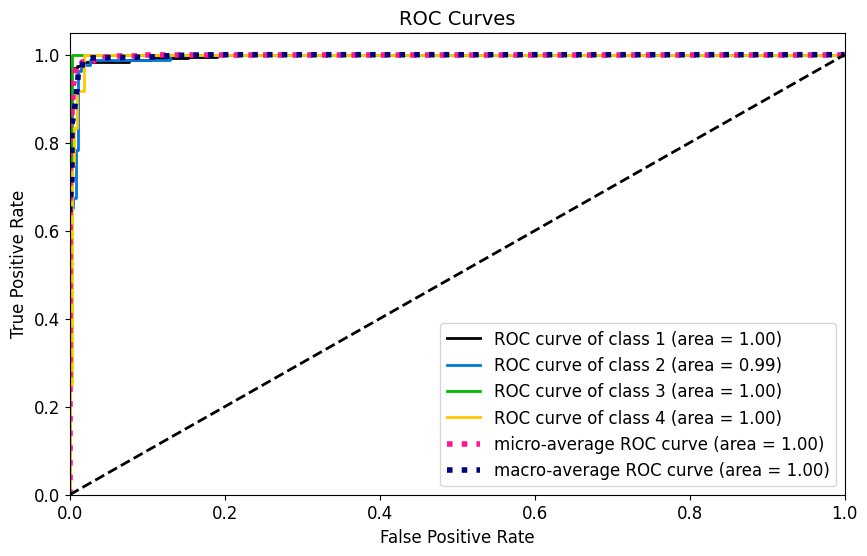

[[227   3   0   0]
 [  3  73   0   0]
 [  0   4  11   0]
 [  1   9   1  14]]
Sensitivity for class 0:  0.9869565217391304
Sensitivity for class 1:  0.9605263157894737
Sensitivity for class 2:  0.7333333333333333
Sensitivity for class 3:  0.56
Specificity for class 0:  0.9607843137254902
Specificity for class 1:  0.9402985074626866
Specificity for class 2:  0.9968253968253968
Specificity for class 3:  1.0


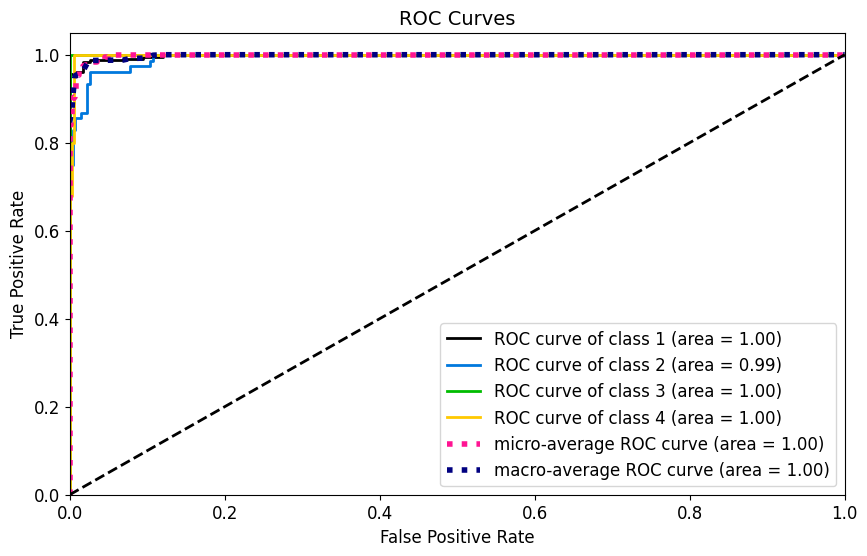

[[231   9   0   0]
 [  4  72   0   1]
 [  0   1  16   0]
 [  1   0   1   9]]
Sensitivity for class 0:  0.9625
Sensitivity for class 1:  0.935064935064935
Sensitivity for class 2:  0.9411764705882353
Sensitivity for class 3:  0.8181818181818182
Specificity for class 0:  0.9509803921568627
Specificity for class 1:  0.9624060150375939
Specificity for class 2:  0.9968051118210862
Specificity for class 3:  0.996875


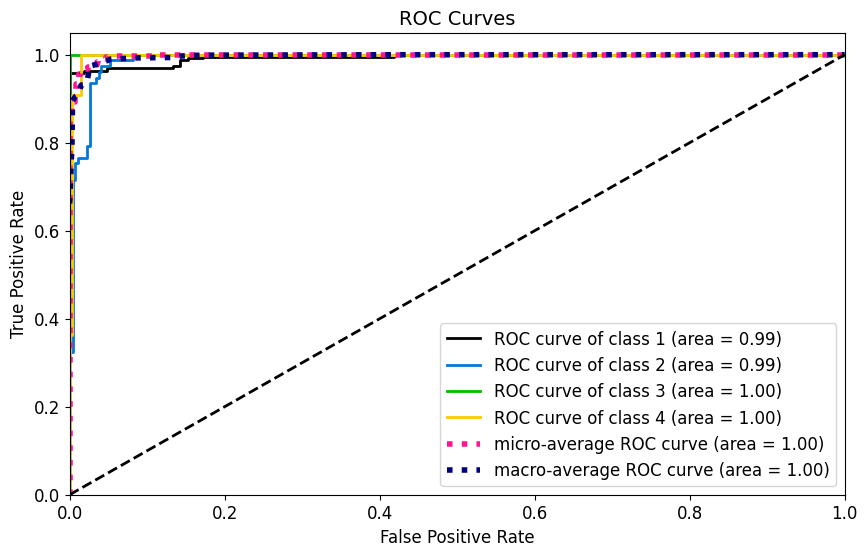

[[244   6   0   0]
 [  2  70   0   1]
 [  0   0  11   0]
 [  0   1   0  10]]
Sensitivity for class 0:  0.976
Sensitivity for class 1:  0.958904109589041
Sensitivity for class 2:  1.0
Sensitivity for class 3:  0.9090909090909091
Specificity for class 0:  0.978494623655914
Specificity for class 1:  0.9742647058823529
Specificity for class 2:  1.0
Specificity for class 3:  0.9969325153374233


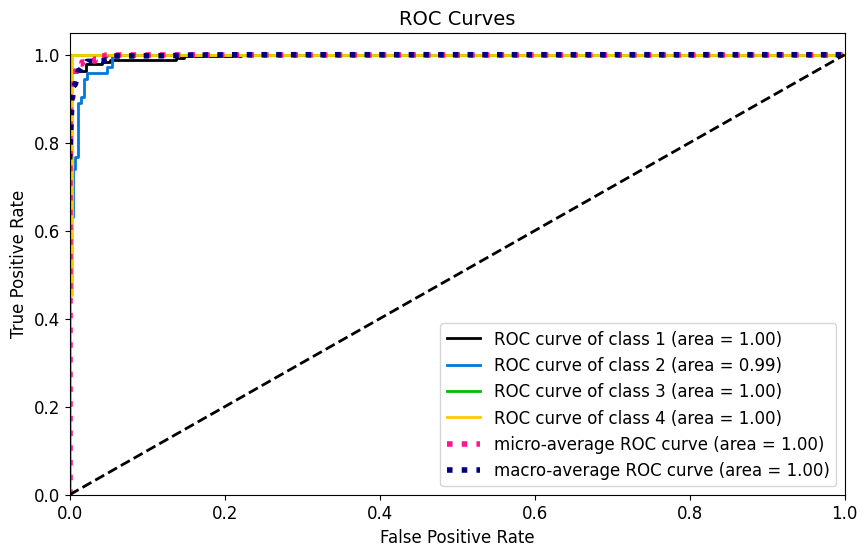

[[238  10   0   0]
 [  5  70   0   0]
 [  0   1  11   0]
 [  0   0   0  10]]
Sensitivity for class 0:  0.9596774193548387
Sensitivity for class 1:  0.9333333333333333
Sensitivity for class 2:  0.9166666666666666
Sensitivity for class 3:  1.0
Specificity for class 0:  0.9479166666666666
Specificity for class 1:  0.9592592592592593
Specificity for class 2:  1.0
Specificity for class 3:  1.0


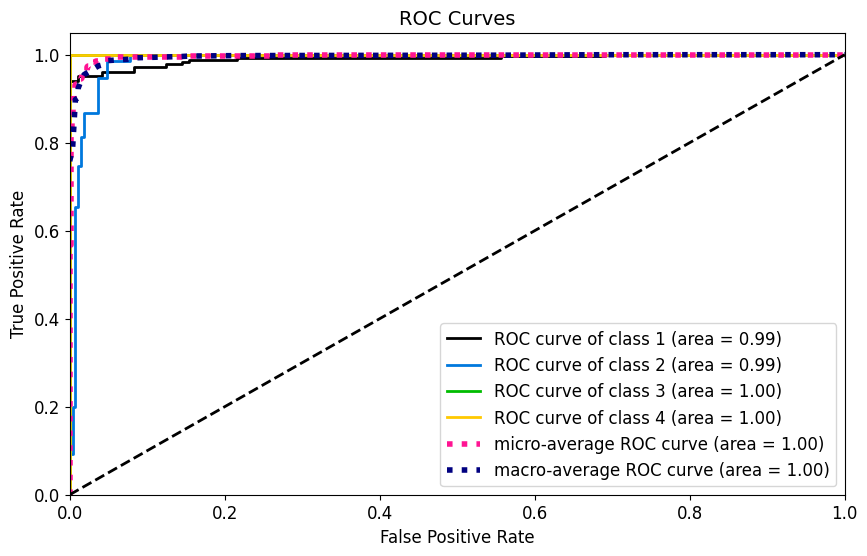

In [42]:
sen1=[]
sen2=[]
sen3=[]
sen4=[]
spec1=[]
spec2=[]
spec3=[]
spec4=[]

clf=svm.SVC(probability=True)

num_folds = 5
fold = KFold(n_splits=num_folds, shuffle = True)
for train_index, test_index in fold.split(X):
    X_train= X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test= y[test_index]

    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    y_prob= clf.predict_proba(X_test)

    predicted=clf.predict(X_test)
    cm = confusion_matrix(y_test,predicted)
    print(cm)

    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2]+cm[0,3])
    print('Sensitivity for class 0: ', sensitivity )
    sen1.append(sensitivity)

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2]+cm[1,3])
    print('Sensitivity for class 1: ', sensitivity )
    sen2.append(sensitivity)

    sensitivity = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2]+cm[2,3])
    print('Sensitivity for class 2: ', sensitivity )
    sen3.append(sensitivity)

    sensitivity = cm[3,3]/(cm[3,0]+cm[3,1]+cm[3,2]+cm[3,3])
    print('Sensitivity for class 3: ', sensitivity )
    sen4.append(sensitivity)
    #----------------------------------------------------------------------

    specificity = (cm[1,1]+cm[2,2]+cm[3,3])/(cm[1,0]+cm[2,0]+cm[3,0]+cm[1,1]+cm[2,2]+cm[3,3])
    print('Specificity for class 0: ', specificity)
    spec1.append(specificity)

    specificity = (cm[0,0]+cm[2,2]+cm[3,3])/(cm[0,1]+cm[2,1]+cm[3,1]+cm[0,0]+cm[2,2]+cm[3,3])
    print('Specificity for class 1: ', specificity)
    spec2.append(specificity)

    specificity = (cm[0,0]+cm[1,1]+cm[3,3])/(cm[0,2]+cm[1,2]+cm[3,2]+cm[0,0]+cm[1,1]+cm[3,3])
    print('Specificity for class 2: ', specificity)
    spec3.append(specificity)

    specificity = (cm[0,0]+cm[1,1]+cm[2,2])/(cm[0,3]+cm[1,3]+cm[2,3]+cm[0,0]+cm[1,1]+cm[2,2])
    print('Specificity for class 3: ', specificity)
    spec3.append(specificity)

#-----------------------------------------------------------------------------------
    y_prob = clf.predict_proba(X_test)


    y_prob= clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_prob,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()

In [43]:
param_grid2 = {'C': [ 1],
              'gamma': [1],
              'kernel': ['rbf','linear'],
              'decision_function_shape':['ovo','ovr']}
svc_gs = GridSearchCV(svm.SVC(probability=True), param_grid=param_grid2, cv=5, refit = True, verbose = 3)
svc_gs.fit(X_train, y_train)
print(" ####### SVM #######")
print(svc_gs.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.726 total time=   1.2s
[CV 2/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.848 total time=   0.8s
[CV 3/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.797 total time=   1.0s
[CV 4/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.844 total time=   1.2s
[CV 5/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.844 total time=   1.3s
[CV 1/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=linear;, score=0.697 total time=   0.3s
[CV 2/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=linear;, score=0.736 total time=   0.3s
[CV 3/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=linear;, score=0.703 total time=   0.3s
[CV 4/5] END C=1, decision_function_shape=ovo, gamma=1, kernel=linear;, score=0.830 total time=   0.3s
[CV 5/5] END C=1, decision_f

In [44]:
y_pred = svc_gs.predict(X_train)
cas = accuracy_score(y_train,y_pred)
print("Accuracy score for training data in SVM is : {}".format(cas))
print("Confusion matrix for SVM is : ")
print(confusion_matrix(y_pred,y_train))
print("Classification report for SVM is : ")
print(classification_report(y_pred,y_train))

Accuracy score for training data in SVM is : 1.0
Confusion matrix for SVM is : 
[[961   0   0   0]
 [  0 309   0   0]
 [  0   0  53   0]
 [  0   0   0  59]]
Classification report for SVM is : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       961
           2       1.00      1.00      1.00       309
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        59

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [45]:
y_pred = svc_gs.predict(X_test)
cas = accuracy_score(y_test,y_pred)
print("Accuracy score for testing data in SVM is : {}".format(cas))
print("Confusion matrix for SVM is : ")
print(confusion_matrix(y_pred,y_test))
print("Classification report for SVM is : ")
print(classification_report(y_pred,y_test))


Accuracy score for testing data in SVM is : 0.9797101449275363
Confusion matrix for SVM is : 
[[243   0   0   0]
 [  5  75   2   0]
 [  0   0  10   0]
 [  0   0   0  10]]
Classification report for SVM is : 
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       243
           2       1.00      0.91      0.96        82
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        10

    accuracy                           0.98       345
   macro avg       0.95      0.98      0.96       345
weighted avg       0.98      0.98      0.98       345

